**Predicting banking crises in selected African countries based on a range of metrics** (Charles Umesi, 30 May 2023)

<table>
    <tr>
        <td><em>case</em>&emsp;&emsp;&emsp;</td>
        <td>general identification key allocated to the country under consideration</td>
    </tr>
    <tr>
        <td><em>cc3</em>&emsp;&emsp;&emsp;</td>
        <td>country code</td>
    </tr>
    <tr>
        <td><em>country</em>&emsp;&emsp;&emsp;</td>
        <td>name of country</td>
    </tr>
    <tr>
        <td><em>year</em>&emsp;&emsp;&emsp;</td>
        <td>the year under consideration</td>
    </tr>
    <tr>
        <td><em>systemic_crisis</em>&emsp;&emsp;&emsp;</td>
        <td>whether there were problems in one or more banks, serious enough to significantly adverse the country's economy</td>
    </tr>
    <tr>
        <td><em>exch_usd</em>&emsp;&emsp;&emsp;</td>
        <td>exchange rate between the country's currency and the US dollar</td>
    </tr>
    <tr>
        <td><em>domestic_debt_in_default</em>&emsp;&emsp;&emsp;</td>
        <td>money owed to creditors in the country that were not paid as obliged</td>
    </tr>
    <tr>
        <td><em>sovereign_external_debt_default</em>&emsp;&emsp;&emsp;</td>
        <td>all debts owed by the governments that were not paid as obliged</td>
    </tr>
    <tr>
        <td><em>gdp_weighted_default</em>&emsp;&emsp;&emsp;</td>
        <td>country weightings in proportion to GDP</td>
    </tr>
    <tr>
        <td><em>inflation_annual_cpi</em>&emsp;&emsp;&emsp;</td>
        <td>annual inflation as measured by the consumer pricing index</td>
    </tr>
    <tr>
        <td><em>independence</em>&emsp;&emsp;&emsp;</td>
        <td>whether the country was independent in the year under consideration</td>
    </tr>
    <tr>
        <td><em>currency_crises</em>&emsp;&emsp;&emsp;</td>
        <td>whether there was a deep and sudden decline in the value of the country's currency</td>
    </tr>
    <tr>
        <td><em>inflation_crises</em>&emsp;&emsp;&emsp;</td>
        <td>whether there was a generalised sharp rise in the cost of goods and services</td>
    </tr>
    <tr>
        <td><em>banking_crisis</em>&emsp;&emsp;&emsp;</td>
        <td>whether many banks in the country got into serious solvency or liquidity problems at the same time</td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read csv file
pd.set_option('display.max_columns', None)
df = pd.read_csv('african_econ_crises.csv')

In [3]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
# Check number of rows
len(df)

1059

In [5]:
# Check number of columns
len(df.columns)

14

In [6]:
# Libraries for some useful visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
plt.rcParams.update({'font.size': 7})

<Axes: xlabel='banking_crisis', ylabel='count'>

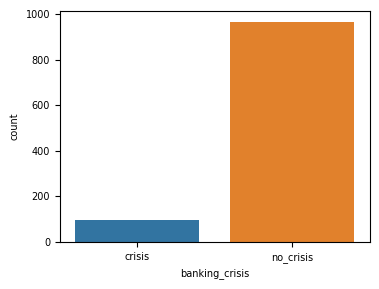

In [8]:
# Checking counts of banking and no-banking crisis
plt.figure(figsize=(4,3))
sns.countplot(x='banking_crisis',data=df)

The incidence of no_crisis far exceeds that of crisis, suggesting that the model to be designed will be far less able to predict a banking crisis than a no-banking crisis

In [9]:
# Checking the number of countries in the dataset
df['country'].unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [10]:
len(df['country'].unique())

13

Not too many countries so visually, we can see the distribution of banking and no-banking crises per country

<Axes: xlabel='country', ylabel='count'>

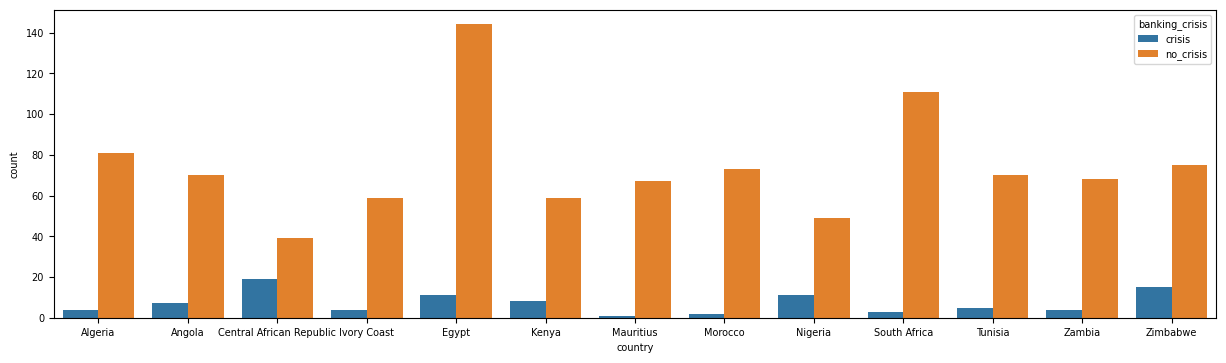

In [11]:
plt.figure(figsize=(15,4))
sns.countplot(x='country',data=df,hue='banking_crisis')

With the exception of the Central African Republic, the number of banking crises per country compared to no-banking crises is very small although it does vary. With the Central African Republic, banking crises have occurred frequently which might be related to the level of conflict in the country

What about correlations? This would be useful but we can't obtain these without feature engineering and even then, the table might be too big to fit into a heatmap or pairplot that can easily be viewed.

Regardless, we still require feature engineering to be able to feed the data to our model, but first, let us find out if we have complete data

In [12]:
# Check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

No missing data

Now, some feature engineering

In [13]:
# Convert countries to booleans
country = pd.get_dummies(df['country'],drop_first=True)
country.head()

,Angola,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia,Zimbabwe
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Drop case, cc3, and country
df.drop(['case','cc3','country'],axis=1,inplace=True)
df.head()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [15]:
# Concatenate country booleans to dataframe
df = pd.concat([df,country],axis=1)
df.head()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,Angola,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia,Zimbabwe
0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,False,False,False,False,False,False,False,False,False,False,False,False
1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,False,False,False,False,False,False,False,False,False,False,False,False
2,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,False,False,False,False,False,False,False,False,False,False,False,False
3,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,False,False,False,False,False,False,False,False,False,False,False,False
4,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# Check if 'year' is integer (as opposed to timestamp)
df['year'].dtype

dtype('int64')

In [17]:
# Convert banking_crisis to booleans
df['banking_crisis'] = df['banking_crisis'].apply(lambda x : 0 if x=='no_crisis' else 1)
df.head()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,Angola,Central African Republic,Egypt,Ivory Coast,Kenya,Mauritius,Morocco,Nigeria,South Africa,Tunisia,Zambia,Zimbabwe
0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False
1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False
2,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False
3,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False
4,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False


With all data in numerical or boolean form, we can now normalise our data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Define features and target
X = df.drop('banking_crisis',axis=1).values
y = df['banking_crisis'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
# Normalise variables
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.shape

(741, 22)

Now create model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-06-06 23:20:35.985717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 23:20:38.700086: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [26]:
from tensorflow.keras.layers import Dropout

Fit data to model and train it

I played around with numerous combinations of layers and eventually came up with the what you see below. I think it's the best combination for the dataset

In [43]:
african_model = Sequential()
african_model.add(Dense(22,activation='relu'))
african_model.add(Dropout(0.7))
african_model.add(Dense(1,activation='sigmoid'))
african_model.compile(optimizer='adam',loss='binary_crossentropy')

In [44]:
X = df.drop('banking_crisis',axis=1).values
y = df['banking_crisis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
african_model.fit(x=X_train,y=y_train,epochs=40,validation_data=(X_test,y_test))

Epoch 1/40
24/24 [==============================] - 1s 17ms/step - loss: 0.6641 - val_loss: 0.5761
Epoch 2/40
24/24 [==============================] - 0s 9ms/step - loss: 0.5646 - val_loss: 0.4960
Epoch 3/40
24/24 [==============================] - 0s 8ms/step - loss: 0.5034 - val_loss: 0.4370
Epoch 4/40
24/24 [==============================] - 0s 8ms/step - loss: 0.4169 - val_loss: 0.3942
Epoch 5/40
24/24 [==============================] - 0s 8ms/step - loss: 0.3857 - val_loss: 0.3692
Epoch 6/40
24/24 [==============================] - 0s 8ms/step - loss: 0.3536 - val_loss: 0.3546
Epoch 7/40
24/24 [==============================] - 0s 7ms/step - loss: 0.3412 - val_loss: 0.3542
Epoch 8/40
24/24 [==============================] - 0s 8ms/step - loss: 0.3283 - val_loss: 0.3529
Epoch 9/40
24/24 [==============================] - 0s 7ms/step - loss: 0.3163 - val_loss: 0.3565
Epoch 10/40
24/24 [==============================] - 0s 8ms/step - loss: 0.2795 - val_loss: 0.3571
Epoch 11/40
24/24 

<Axes: >

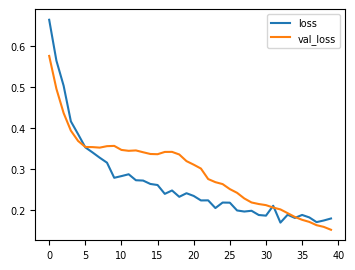

In [46]:
loss_df = pd.DataFrame(african_model.history.history)
loss_df.plot(figsize=(4,3))

In [47]:
predictions = african_model.predict(X_test)
crises_predictions = np.round(predictions)
crises_predictions

10/10 [==============================] - 0s 5ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

Evaluate performance

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test,crises_predictions))
print('\n',confusion_matrix(y_test,crises_predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       282
           1       1.00      0.33      0.50        36

    accuracy                           0.92       318
   macro avg       0.96      0.67      0.73       318
weighted avg       0.93      0.92      0.91       318


 [[282   0]
 [ 24  12]]


As speculated earlier, the model when designed would be far better at predicting a no_banking crisis (0s) than a banking_crisis (1s), which is indeed what the metrics for the model are indicating

But let's put its prediction to the test!

In [50]:
import random

In [51]:
random.seed(101)
random_ind = random.randint(0,len(df))

test_country = df.drop('banking_crisis',axis=1).iloc[random_ind]
test_country

year                                   1975
systemic_crisis                           0
exch_usd                             0.3913
domestic_debt_in_default                  0
sovereign_external_debt_default           0
gdp_weighted_default                    0.0
inflation_annual_cpi               9.899265
independence                              1
currency_crises                           0
inflation_crises                          0
Angola                                False
Central African Republic              False
Egypt                                  True
Ivory Coast                           False
Kenya                                 False
Mauritius                             False
Morocco                               False
Nigeria                               False
South Africa                          False
Tunisia                               False
Zambia                                False
Zimbabwe                              False
Name: 398, dtype: object

*test_country* is **Egypt** and *test_year* is **1975**

In [52]:
test_country = test_country.to_numpy()

In [53]:
test_country.shape

(22,)

In [54]:
# Reshape
test_country = test_country.reshape(1,22)
test_country.shape

(1, 22)

In [55]:
# Transform and predict
test_country = scaler.transform(test_country)
np.round(african_model.predict(test_country))

1/1 [==============================] - 0s 40ms/step


array([[0.]], dtype=float32)

So, the model is saying that there was no banking crisis in Egypt in 1975; let's see if that is correct

In [56]:
df.loc[398, 'banking_crisis']

0

It is correct!